In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json
import spacy

In [10]:
df = pd.read_csv('/home/tanmay/Thesis_code/Thesis/Data/dut_full_combined.csv')

In [11]:
df.head()

,word,parsed_xml,context
0,aanbiddingszanger,"<artikel id=""151279"" last-modified=""2023-10-04...",Met stip binnen op nummer 1: een aanbiddingsza...
1,aanblijfpremie,"<artikel id=""73079"" last-modified=""2023-10-04""...",Het gaat om misbruik van dienstauto's en telef...
2,aanbodgedreven,"<artikel id=""73080"" last-modified=""2023-10-04""...",Zo zijn werknemers bijvoorbeeld minder bereid ...
3,aanbodgestuurd,"<artikel id=""73081"" last-modified=""2023-10-04""...",Het project heeft tot doel te verkennen in hoe...
4,aandachtseconomie,"<artikel id=""166967"" last-modified=""2024-02-02...",Waarschijnlijk wil je meer tijd besteden aan j...


In [12]:
df

,word,parsed_xml,context
0,aanbiddingszanger,"<artikel id=""151279"" last-modified=""2023-10-04...",Met stip binnen op nummer 1: een aanbiddingsza...
1,aanblijfpremie,"<artikel id=""73079"" last-modified=""2023-10-04""...",Het gaat om misbruik van dienstauto's en telef...
2,aanbodgedreven,"<artikel id=""73080"" last-modified=""2023-10-04""...",Zo zijn werknemers bijvoorbeeld minder bereid ...
3,aanbodgestuurd,"<artikel id=""73081"" last-modified=""2023-10-04""...",Het project heeft tot doel te verkennen in hoe...
4,aandachtseconomie,"<artikel id=""166967"" last-modified=""2024-02-02...",Waarschijnlijk wil je meer tijd besteden aan j...
...,...,...,...
29142,zwoegen als een paard,"\n<artikel id=""158917"" last-modified=""2021-07-...",Boer Frans had altijd al 16 uur per dag nodig ...
29143,zwoeger,"\n<artikel id=""67730"" last-modified=""2023-10-0...","""Er is iets in mijn schrijven waarvoor de best..."
29144,Zwollenaar,"\n<artikel id=""68736"" last-modified=""2023-10-0...",Voorlopig sluit ik mij nog niet aan bij welke ...
29145,Zwolse,"\n<artikel id=""70752"" last-modified=""2023-10-0...",Marijn de Vries staat zondag in Itali\xc3\xab ...


In [8]:
dfn = pd.read_csv('/home/tanmay/Thesis_code/Thesis/Data/dut_neo_xml.csv')

In [9]:
dfn

,word,parsed_xml
0,aanbiddingszanger,"<artikel id=""151279"" last-modified=""2023-10-04..."
1,aanblijfpremie,"<artikel id=""73079"" last-modified=""2023-10-04""..."
2,aanbodgedreven,"<artikel id=""73080"" last-modified=""2023-10-04""..."
3,aanbodgestuurd,"<artikel id=""73081"" last-modified=""2023-10-04""..."
4,aandachtseconomie,"<artikel id=""166967"" last-modified=""2024-02-02..."
...,...,...
1963,zwijgschikking,"<artikel id=""155531"" last-modified=""2023-10-04..."
1964,zwijnneusrat,"<artikel id=""155422"" last-modified=""2023-10-04..."
1965,zwitsalmaatschappij,"<artikel id=""168726"" last-modified=""2023-10-04..."
1966,zzp'en,"<artikel id=""155398"" last-modified=""2023-11-01..."


In [13]:
df['example_length'] = df['context'].apply(len)

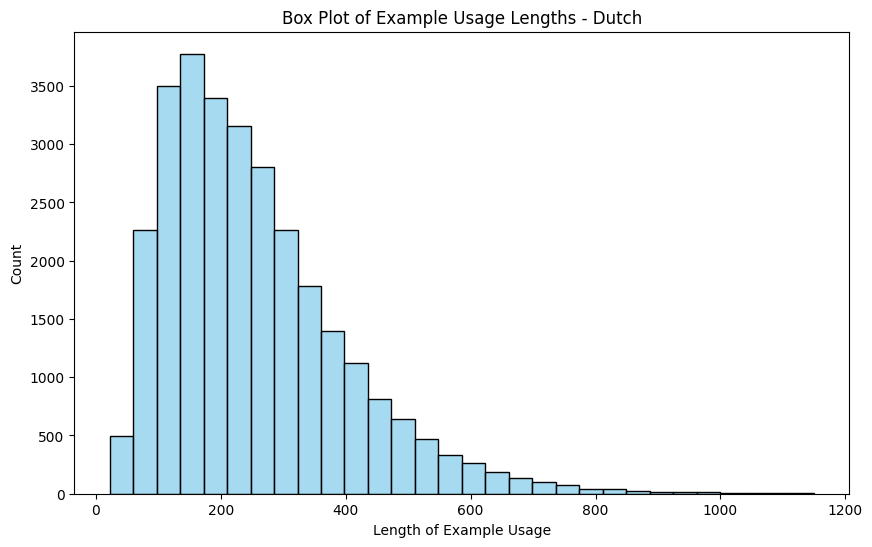

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['example_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Box Plot of Example Usage Lengths - Dutch')
plt.xlabel('Length of Example Usage')
plt.savefig('Results/dut_context_length_plot.png', dpi=300, bbox_inches='tight')
plt.show()

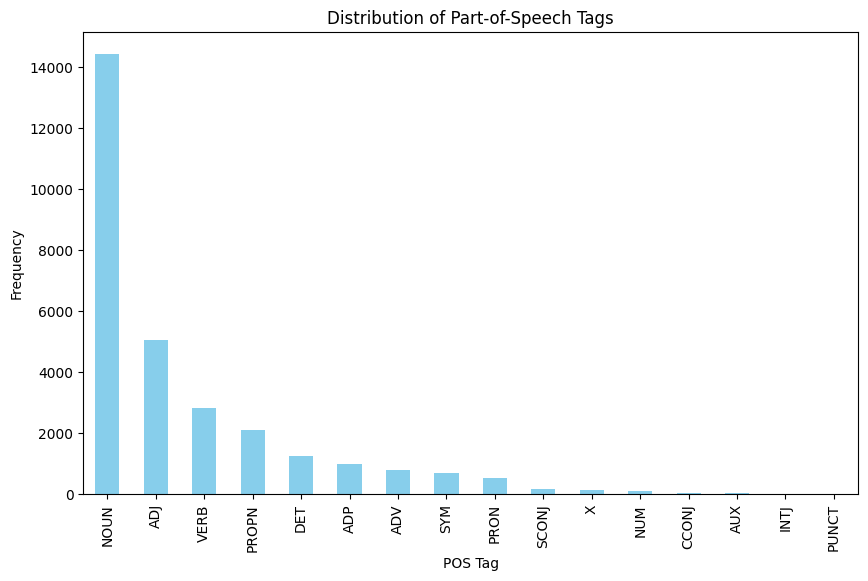

In [21]:
# Load the Dutch language model for POS detection
nlp = spacy.load('nl_core_news_sm')
def get_pos(word):
    doc = nlp(word)
    return doc[0].pos_
df['pos'] = df['word'].apply(get_pos)

pos_counts = df['pos'].value_counts()

plt.figure(figsize=(10, 6))
pos_counts.plot.bar(color='skyblue')
plt.title('Distribution of Part-of-Speech Tags')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.show()

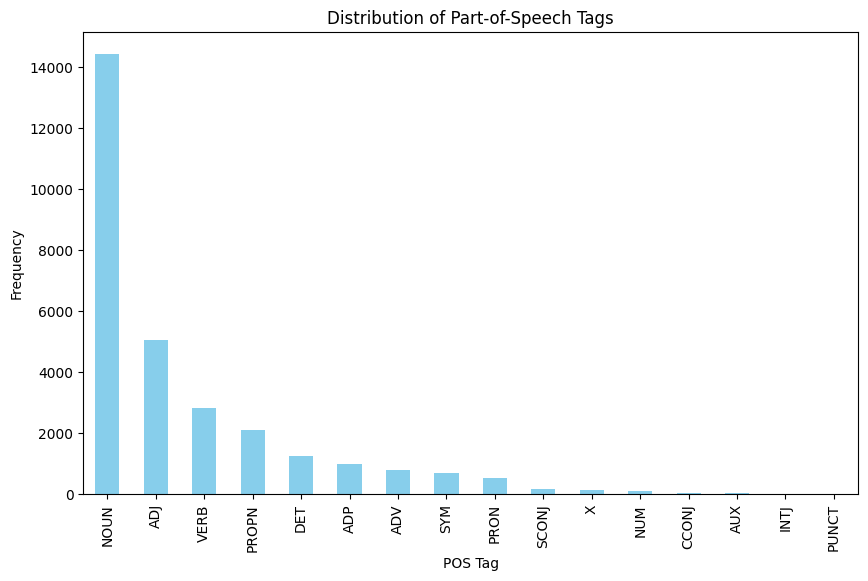

In [22]:
plt.figure(figsize=(10, 6))
pos_counts.plot.bar(color='skyblue')
plt.title('Distribution of Part-of-Speech Tags')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.savefig('Results/dut_pos_distribution.png', dpi=300, bbox_inches='tight')
plt.show()